In [1]:
import pandas as pd
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Replace 4 with your number of physical cores
os.environ["OMP_NUM_THREADS"] = "1"
 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("D:\Doc\VS CODE\Global_firepower\global_military_firepower_2025.csv")

# 1. Check for missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

# 2. Standardize units
# (Assume all budgets are in USD and roadways in km, but check for anomalies)
print("Unique budget units (if any):", df['defense_budget_usd'].dtype)
print("Unique roadway units (if any):", df['roadway_coverage_km'].dtype)

# 3. Normalize metrics: military personnel per capita
df['active_per_1000'] = (df['active_personnel'] / df['total_population']) * 1000
df['reserve_per_1000'] = (df['reserve_personnel'] / df['total_population']) * 1000

# Show a preview of the normalized columns
print(df[['country', 'active_per_1000', 'reserve_per_1000']].head())

Missing values per column:
 rank                                          0
country                                       0
region                                        0
total_population                              0
total_military_manpower                       0
fit_for_service                               0
population_reaching_military_age_annually     0
active_personnel                              0
reserve_personnel                             0
paramilitary                                  0
total_military_aircraft                       0
fighter_aircraft                              0
attack_aircraft                               0
transport_aircraft                            0
trainer_aircraft                              0
special_mission_aircraft                      0
tanker_aircraft                               0
total_military_helicopters                    0
attack_helicopters                            0
tanks                                         0
armored_figh

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\saich\AppData\Local\Temp\ipykernel_15632\730686227.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Doc\VS CODE\Global_firepower\global_military_firepower_2025.csv")


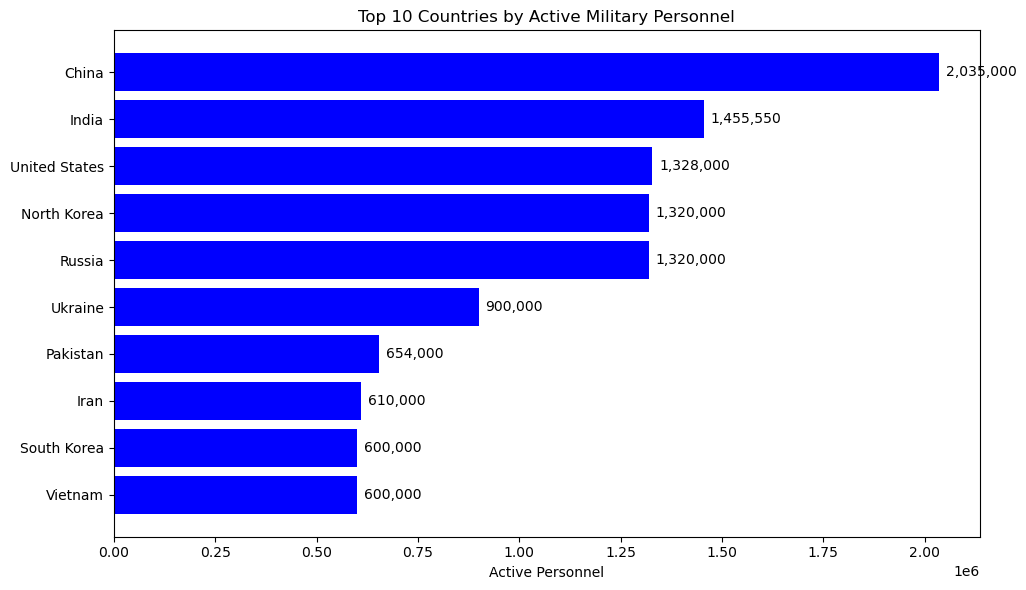

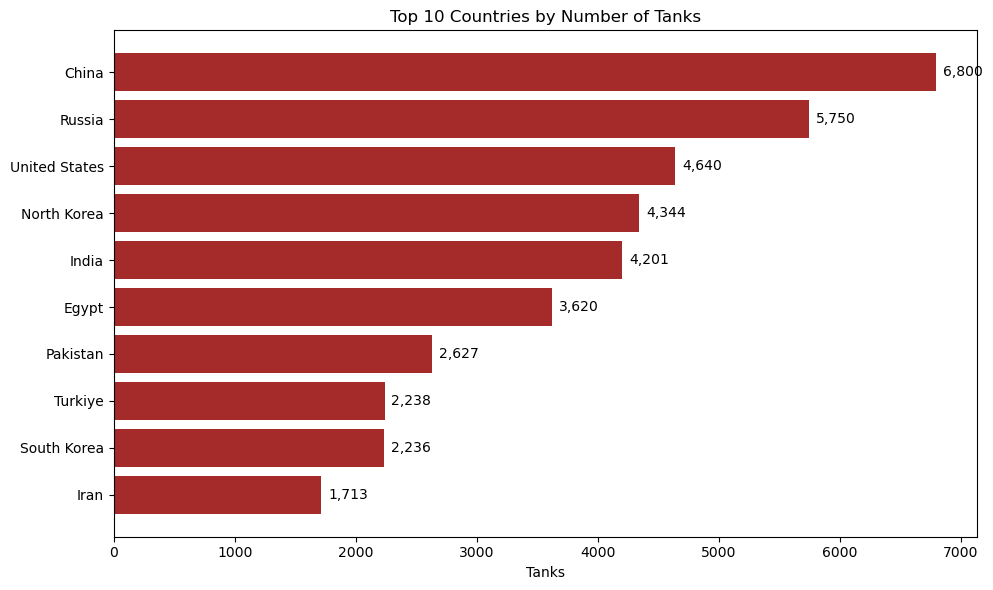

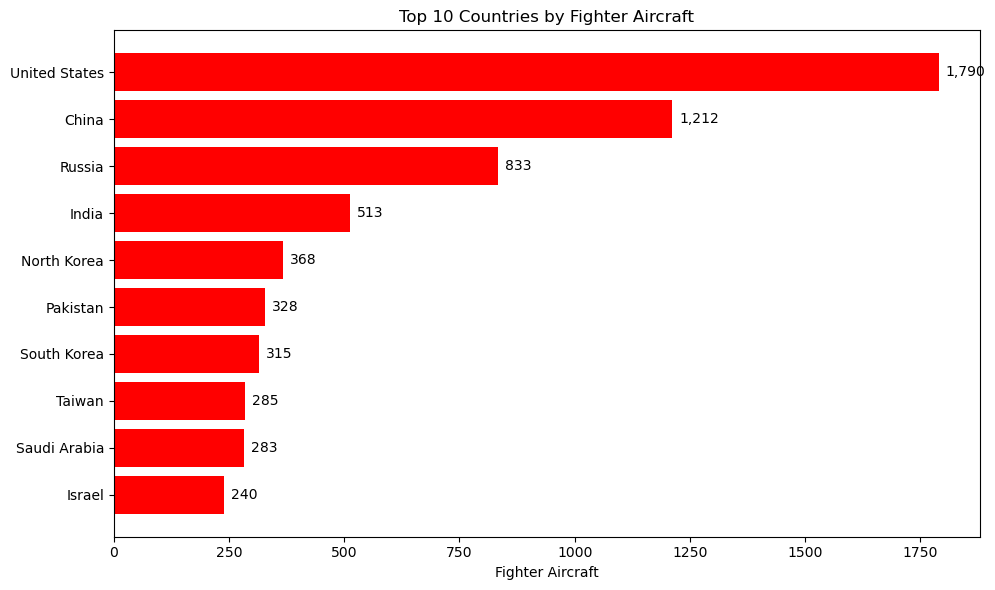

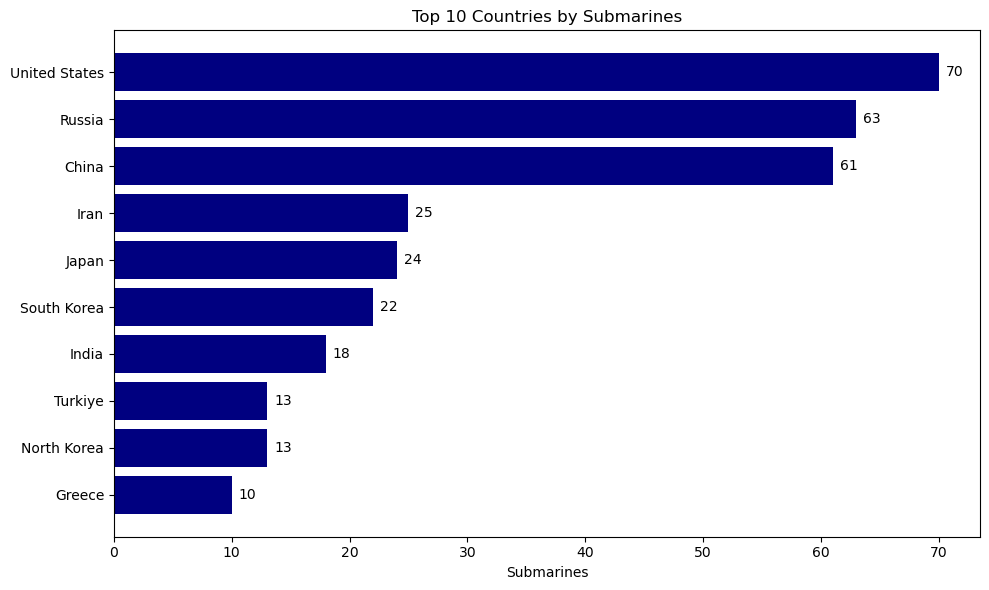

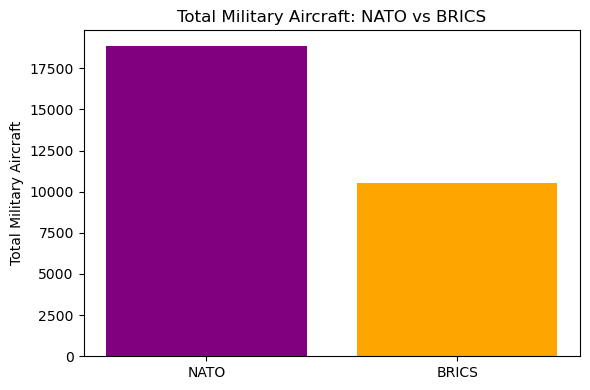

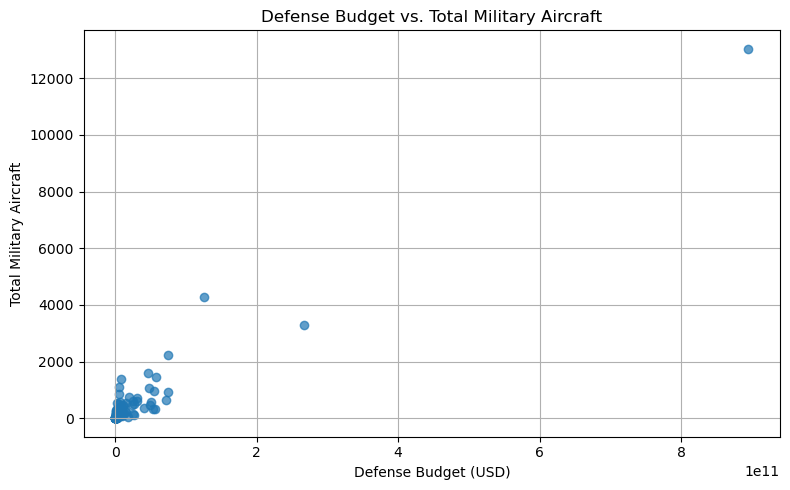

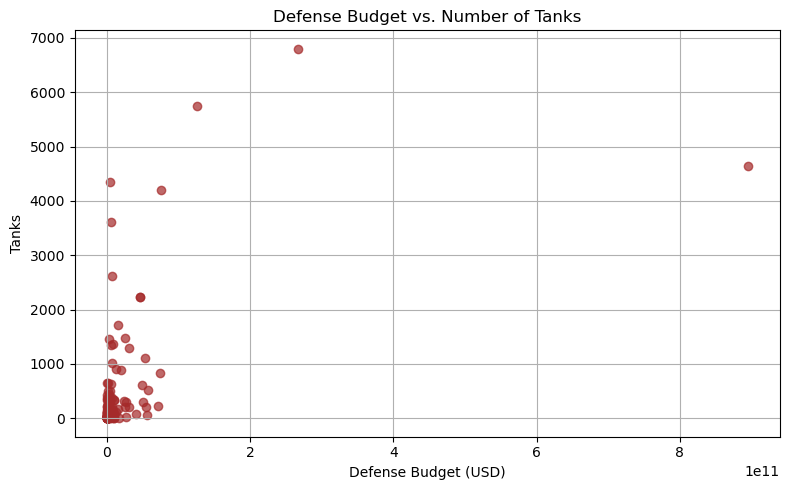

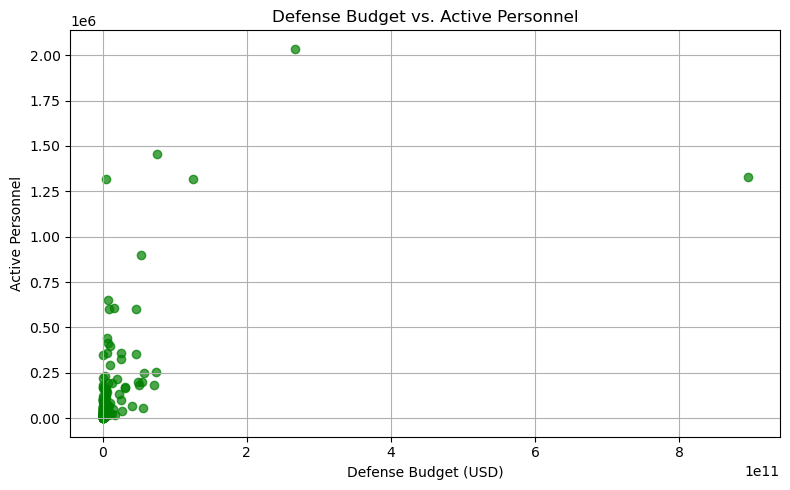

Potential outliers (high budget, low personnel/equipment):
      country  defense_budget_usd  active_personnel  total_military_aircraft  \
17  Australia        5.570000e+10             57350                      327   
27     Canada        4.100000e+10             68000                      351   

    tanks  
17     59  
27     74  


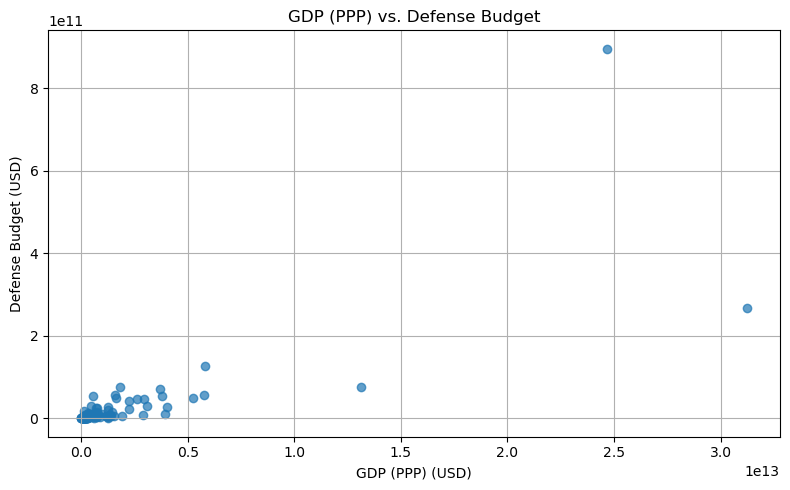

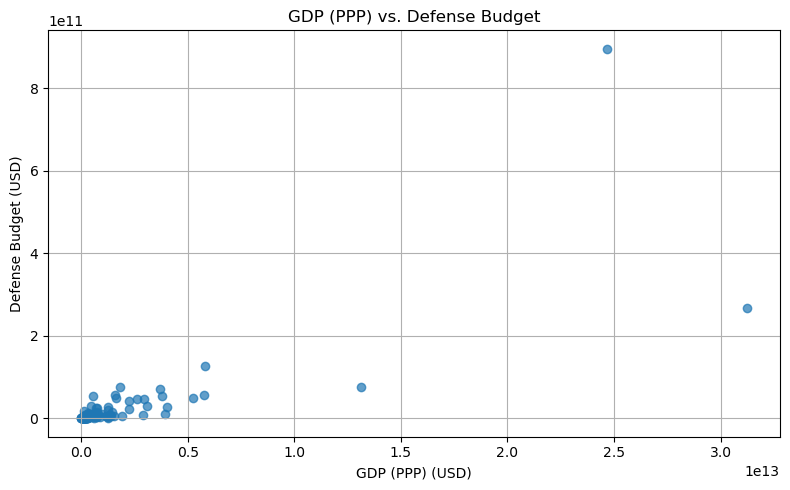

Countries spending >3% of GDP (PPP) on defense:
           country  defense_budget_usd  purchasing_power_parity_usd  \
0    United States        8.950000e+11                 2.466200e+13   
14          Israel        3.050000e+10                 4.710300e+11   
17       Australia        5.570000e+10                 1.584000e+12   
19         Ukraine        5.370000e+10                 5.599810e+11   
20          Poland        4.870000e+10                 1.616000e+12   
23    Saudi Arabia        7.476000e+10                 1.831000e+12   
25         Algeria        2.500000e+10                 6.999470e+11   
33     North Korea        4.736000e+09                 7.200000e+10   
43     Switzerland        2.503900e+10                 7.337790e+11   
58         Morocco        1.340000e+10                 3.374800e+11   
66            Cuba        4.508784e+09                 1.414000e+11   
71           Qatar        9.432000e+09                 3.049730e+11   
78          Kuwait        6.9

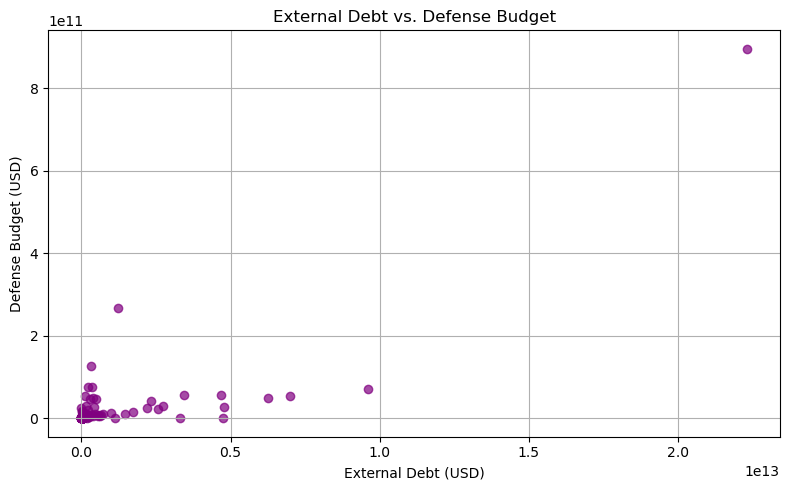

C:\Users\saich\AppData\Local\Temp\ipykernel_15632\638824290.py:186: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_carriers, y='country', x='aircraft_carriers', palette='Blues_r')


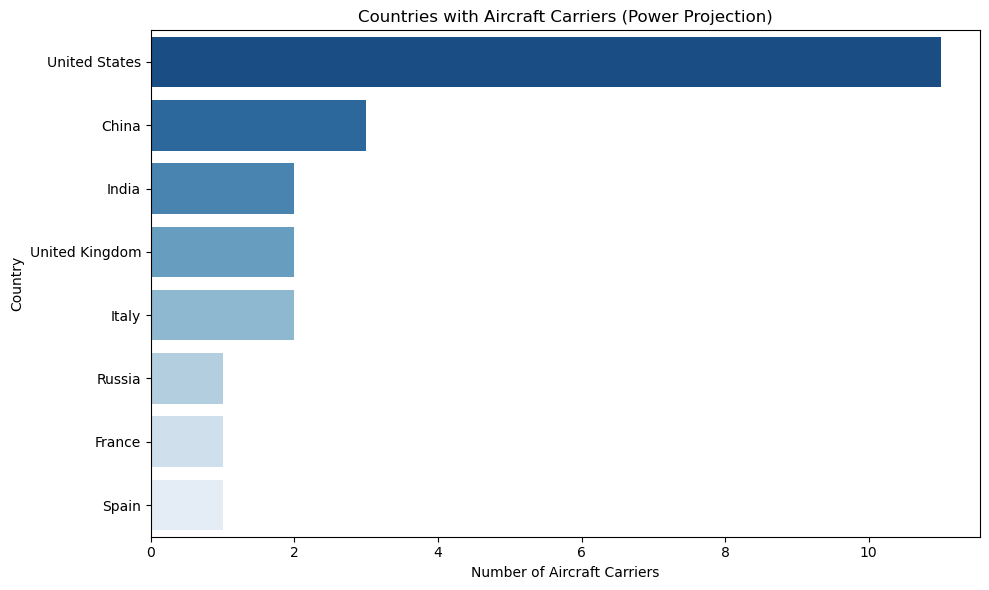

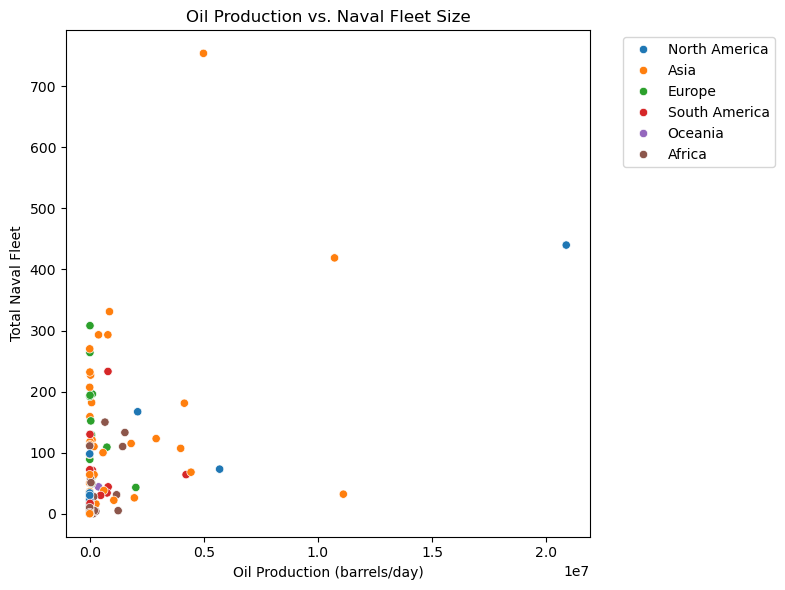

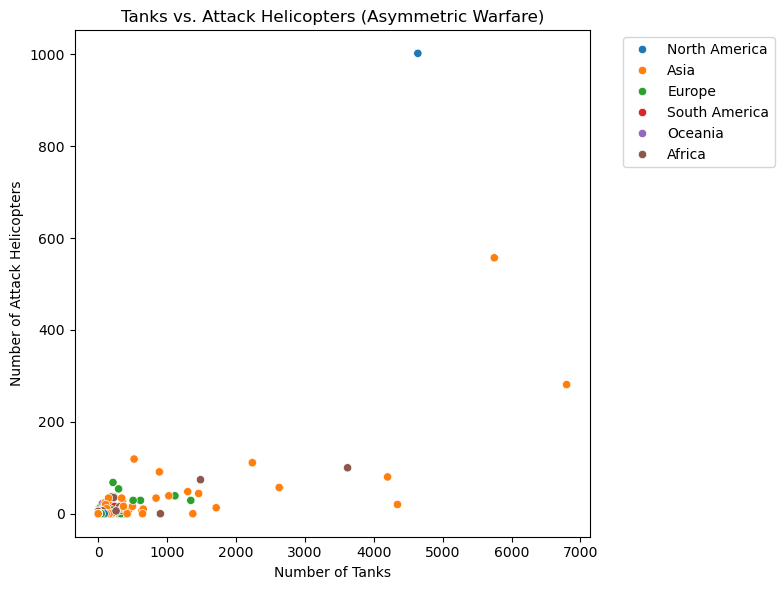

Countries with few tanks but many attack helicopters (asymmetric warfare focus):
      country  tanks  attack_helicopters
17  Australia     59                  22
Top 10 countries by total serviceable airports:
           country  total_serviceable_airports
0    United States                       15873
10          Brazil                        4919
17       Australia                        2180
31          Mexico                        1485
27          Canada                        1425
5   United Kingdom                        1043
1           Russia                         904
13         Germany                         838
32       Argentina                         756
6           France                         689
Top 10 countries by major ports and terminals:
           country  major_ports_and_terminals
0    United States                        666
27          Canada                        284
5   United Kingdom                        185
7            Japan                       

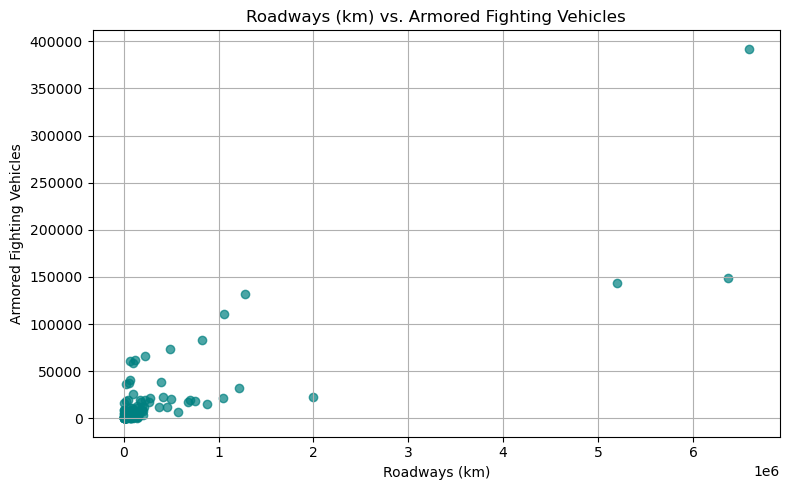

C:\Users\saich\AppData\Local\Temp\ipykernel_15632\638824290.py:242: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_budget, y='country', x='defense_budget_usd', palette='Blues_r')


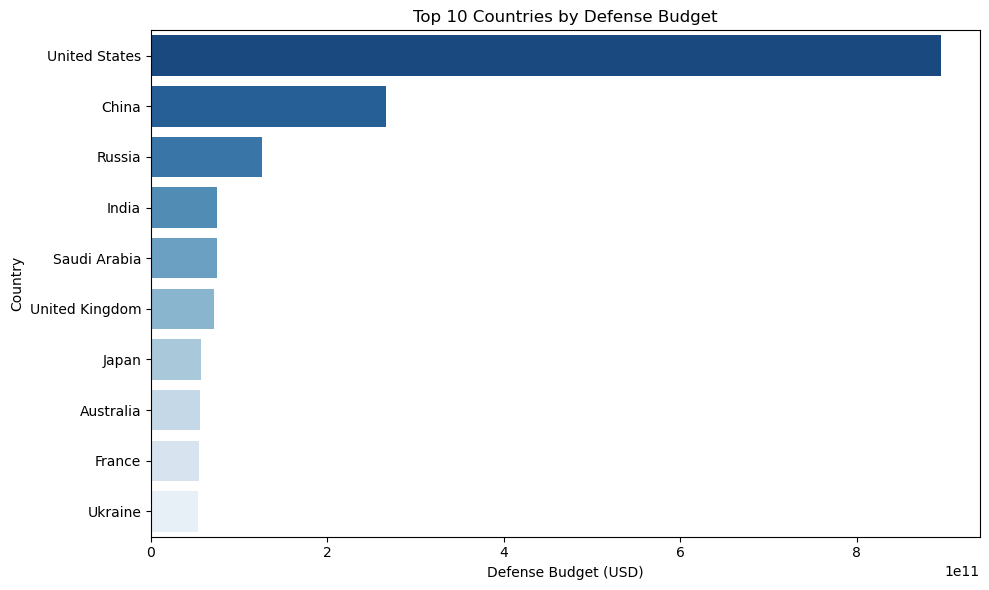

C:\Users\saich\AppData\Local\Temp\ipykernel_15632\638824290.py:252: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tanks, y='country', x='tanks', palette='Oranges_r')


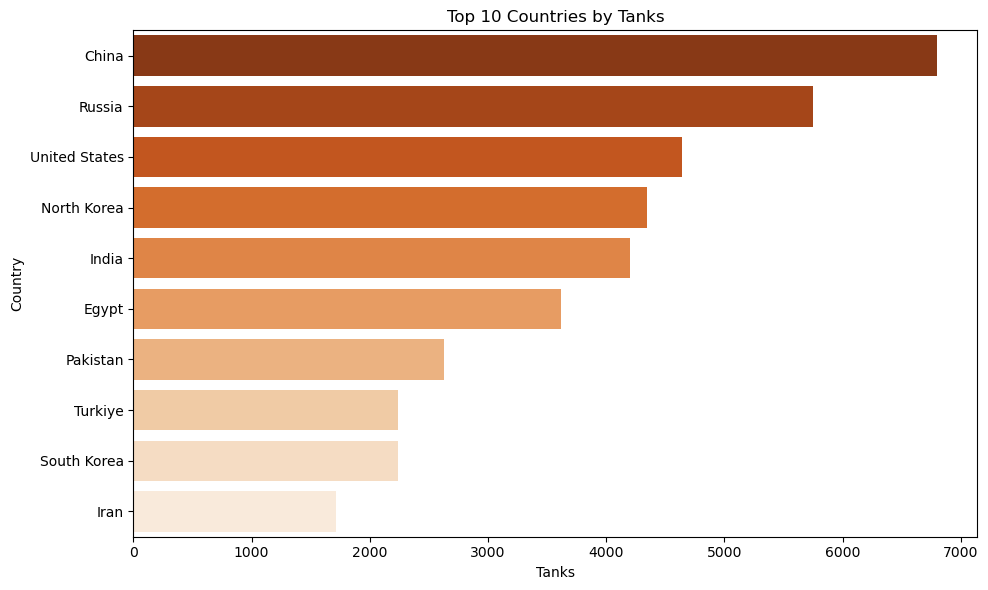

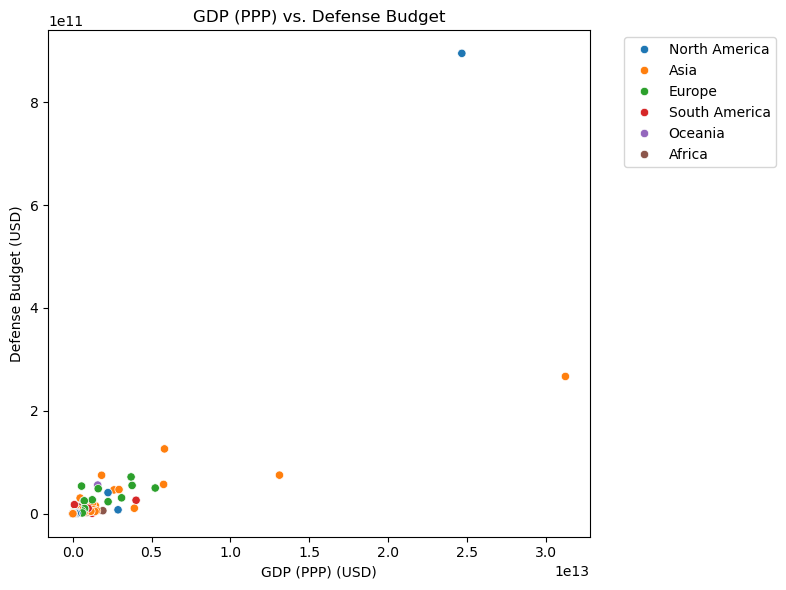

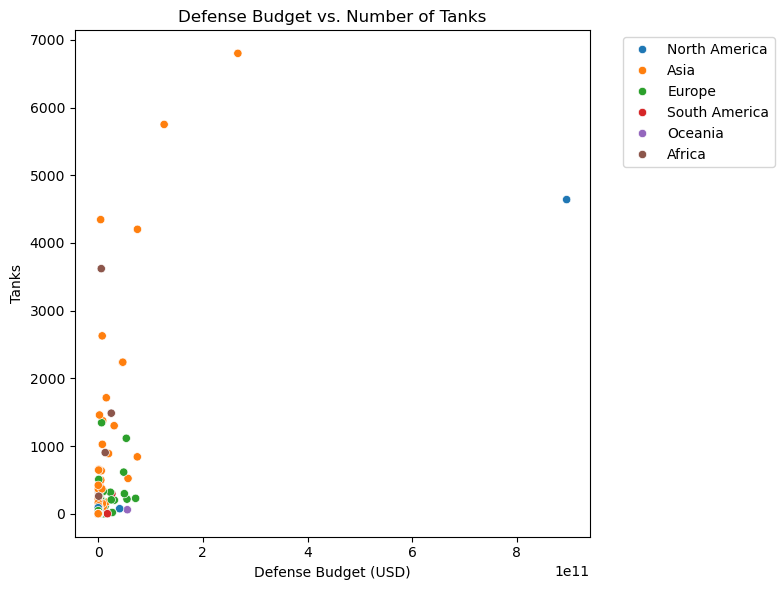

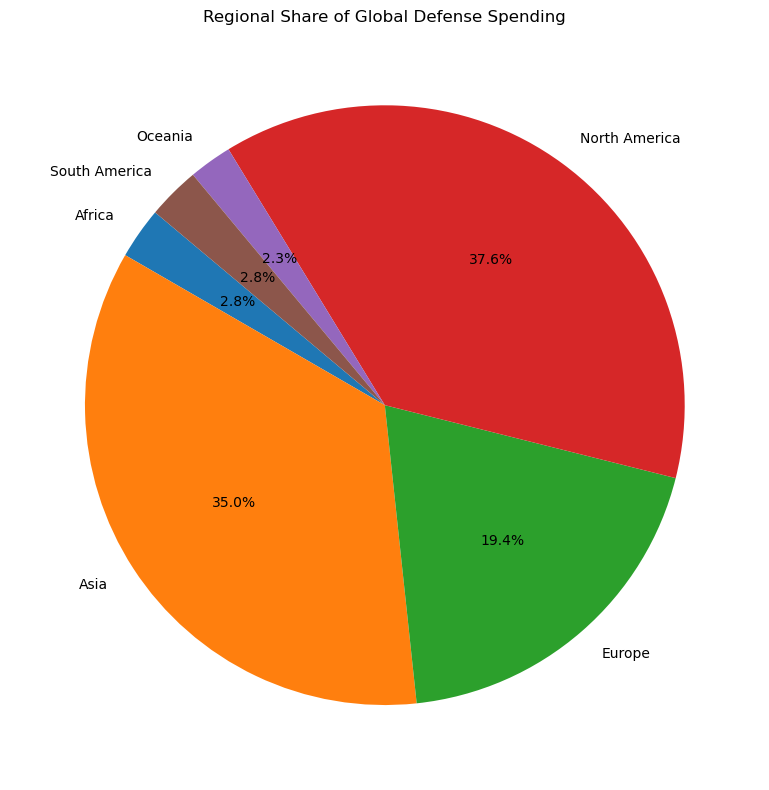

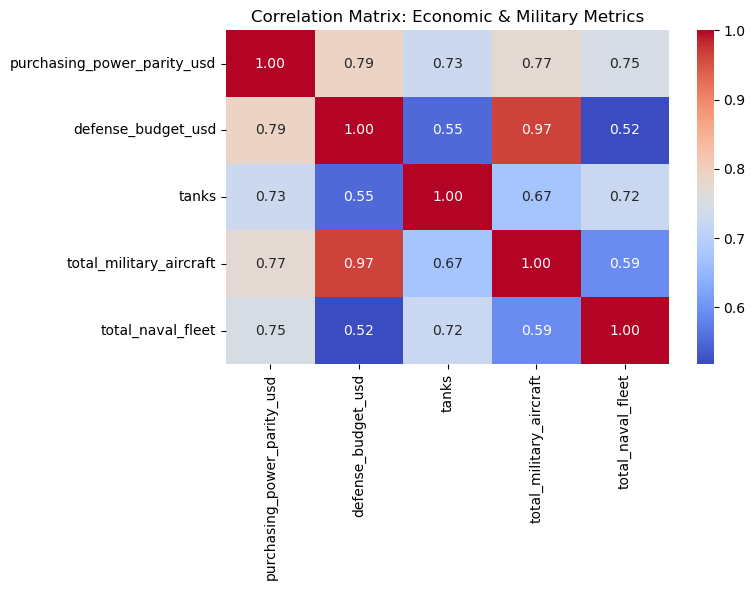

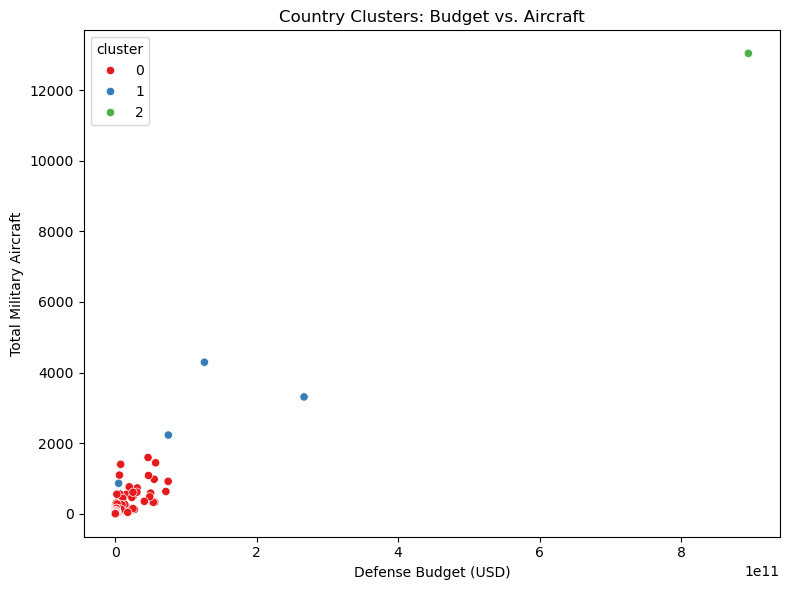

Countries with highest active-to-reserve ratio:
          country  active_personnel  reserve_personnel  \
23   Saudi Arabia            257000                  0   
30        Nigeria            230000                  0   
94       Cambodia            221000                  0   
42           Iraq            193000                  0   
112   South Sudan            185000                  0   
34     Bangladesh            163000                  0   
51       Ethiopia            162000                  0   
32      Argentina            108000                  0   
55         Angola            107000                  0   
125         Nepal             95000                  0   

     active_to_reserve_ratio  
23                  257000.0  
30                  230000.0  
94                  221000.0  
42                  193000.0  
112                 185000.0  
34                  163000.0  
51                  162000.0  
32                  108000.0  
55                  107000.0  
125

In [3]:
# Top 10 countries by active personnel with values as legends
top_active = df[['country', 'active_personnel']].sort_values('active_personnel', ascending=False).head(10)
plt.figure(figsize=(10,6))
bars = plt.barh(top_active['country'][::-1], top_active['active_personnel'][::-1], color='blue')
plt.title('Top 10 Countries by Active Military Personnel')
plt.xlabel('Active Personnel')
plt.tight_layout()
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{int(width):,}', 
                 xy=(width, bar.get_y() + bar.get_height()/2),
                 xytext=(5, 0),
                 textcoords='offset points',
                 va='center', ha='left', fontsize=10, color='black')
plt.show()

# Top 10 countries by tanks with values as legends
top_tanks = df[['country', 'tanks']].sort_values('tanks', ascending=False).head(10)
plt.figure(figsize=(10,6))
bars = plt.barh(top_tanks['country'][::-1], top_tanks['tanks'][::-1], color='brown')
plt.title('Top 10 Countries by Number of Tanks')
plt.xlabel('Tanks')
plt.tight_layout()
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{int(width):,}', 
                 xy=(width, bar.get_y() + bar.get_height()/2),
                 xytext=(5, 0),
                 textcoords='offset points',
                 va='center', ha='left', fontsize=10, color='black')
plt.show()

# Top 10 countries by fighter aircraft with values as legends
top_fighters = df[['country', 'fighter_aircraft']].sort_values('fighter_aircraft', ascending=False).head(10)
plt.figure(figsize=(10,6))
bars = plt.barh(top_fighters['country'][::-1], top_fighters['fighter_aircraft'][::-1], color='red')
plt.title('Top 10 Countries by Fighter Aircraft')
plt.xlabel('Fighter Aircraft')
plt.tight_layout()
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{int(width):,}', 
                 xy=(width, bar.get_y() + bar.get_height()/2),
                 xytext=(5, 0),
                 textcoords='offset points',
                 va='center', ha='left', fontsize=10, color='black')
plt.show()

# Top 10 countries by submarines with values as legends
top_submarines = df[['country', 'submarines']].sort_values('submarines', ascending=False).head(10)
plt.figure(figsize=(10,6))
bars = plt.barh(top_submarines['country'][::-1], top_submarines['submarines'][::-1], color='navy')
plt.title('Top 10 Countries by Submarines')
plt.xlabel('Submarines')
plt.tight_layout()
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{int(width):,}', 
                 xy=(width, bar.get_y() + bar.get_height()/2),
                 xytext=(5, 0),
                 textcoords='offset points',
                 va='center', ha='left', fontsize=10, color='black')
plt.show()


# Example: Regional comparison (NATO vs BRICS) by total military aircraft
nato = ['United States', 'United Kingdom', 'France', 'Germany', 'Italy', 'Canada', 'Turkey', 'Spain', 'Poland', 'Netherlands', 'Belgium', 'Greece', 'Czech Republic', 'Hungary', 'Portugal', 'Norway', 'Denmark', 'Slovakia', 'Bulgaria', 'Croatia', 'Slovenia', 'Albania', 'Estonia', 'Latvia', 'Lithuania', 'Luxembourg', 'Romania', 'Montenegro', 'North Macedonia']
brics = ['Brazil', 'Russia', 'India', 'China', 'South Africa']

nato_total_aircraft = df[df['country'].isin(nato)]['total_military_aircraft'].sum()
brics_total_aircraft = df[df['country'].isin(brics)]['total_military_aircraft'].sum()

plt.figure(figsize=(6,4))
plt.bar(['NATO', 'BRICS'], [nato_total_aircraft, brics_total_aircraft], color=['purple', 'orange'])
plt.title('Total Military Aircraft: NATO vs BRICS')
plt.ylabel('Total Military Aircraft')
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt

# Budget vs. Aircraft Total
plt.figure(figsize=(8,5))
plt.scatter(df['defense_budget_usd'], df['total_military_aircraft'], alpha=0.7)
plt.title('Defense Budget vs. Total Military Aircraft')
plt.xlabel('Defense Budget (USD)')
plt.ylabel('Total Military Aircraft')
plt.grid(True)
plt.tight_layout()
plt.show()

# Budget vs. Tanks
plt.figure(figsize=(8,5))
plt.scatter(df['defense_budget_usd'], df['tanks'], alpha=0.7, color='brown')
plt.title('Defense Budget vs. Number of Tanks')
plt.xlabel('Defense Budget (USD)')
plt.ylabel('Tanks')
plt.grid(True)
plt.tight_layout()
plt.show()

# Budget vs. Active Personnel
plt.figure(figsize=(8,5))
plt.scatter(df['defense_budget_usd'], df['active_personnel'], alpha=0.7, color='green')
plt.title('Defense Budget vs. Active Personnel')
plt.xlabel('Defense Budget (USD)')
plt.ylabel('Active Personnel')
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify outliers: High budget but low personnel/equipment
outliers = df[
    (df['defense_budget_usd'] > df['defense_budget_usd'].quantile(0.9)) &
    (
        (df['active_personnel'] < df['active_personnel'].quantile(0.5)) |
        (df['total_military_aircraft'] < df['total_military_aircraft'].quantile(0.5)) |
        (df['tanks'] < df['tanks'].quantile(0.5))
    )
]
print("Potential outliers (high budget, low personnel/equipment):")
print(outliers[['country', 'defense_budget_usd', 'active_personnel', 'total_military_aircraft', 'tanks']])




# GDP (PPP) vs. Defense Spending
plt.figure(figsize=(8,5))
plt.scatter(df['purchasing_power_parity_usd'], df['defense_budget_usd'], alpha=0.7)
plt.title('GDP (PPP) vs. Defense Budget')
plt.xlabel('GDP (PPP) (USD)')
plt.ylabel('Defense Budget (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate Defense Spending as % of GDP (PPP)
df['defense_pct_gdp'] = (df['defense_budget_usd'] / df['purchasing_power_parity_usd']) * 100

# GDP (PPP) vs. Defense Spending
plt.figure(figsize=(8,5))
plt.scatter(df['purchasing_power_parity_usd'], df['defense_budget_usd'], alpha=0.7)
plt.title('GDP (PPP) vs. Defense Budget')
plt.xlabel('GDP (PPP) (USD)')
plt.ylabel('Defense Budget (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate Defense Spending as % of GDP (PPP)
df['defense_pct_gdp'] = (df['defense_budget_usd'] / df['purchasing_power_parity_usd']) * 100

# Highlight countries spending >3% of GDP (PPP) on defense
high_spenders = df[df['defense_pct_gdp'] > 3]
print("Countries spending >3% of GDP (PPP) on defense:")
print(high_spenders[['country', 'defense_budget_usd', 'purchasing_power_parity_usd', 'defense_pct_gdp']])

# Highlight countries spending >3% of GDP on defense
high_spenders = df[df['defense_pct_gdp'] > 3]
print("Countries spending >3% of GDP on defense:")
print(high_spenders[['country', 'defense_budget_usd', 'purchasing_power_parity_usd', 'defense_pct_gdp']])

# Oil-rich nations with high budgets
oil_rich = df[(df['oil_production_bbl'] > df['oil_production_bbl'].quantile(0.9)) & 
              (df['defense_budget_usd'] > df['defense_budget_usd'].quantile(0.75))]
print("Oil-rich nations with high defense budgets:")
print(oil_rich[['country', 'oil_production_bbl', 'defense_budget_usd']])

# Debt Burden: Compare external debt to defense spending
plt.figure(figsize=(8,5))
plt.scatter(df['external_debt_usd'], df['defense_budget_usd'], alpha=0.7, color='purple')
plt.title('External Debt vs. Defense Budget')
plt.xlabel('External Debt (USD)')
plt.ylabel('Defense Budget (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()




# 1. Power Projection: Countries with aircraft carriers
top_carriers = df[df['aircraft_carriers'] > 0][['country', 'aircraft_carriers']].sort_values('aircraft_carriers', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_carriers, y='country', x='aircraft_carriers', palette='Blues_r')
plt.title('Countries with Aircraft Carriers (Power Projection)')
plt.xlabel('Number of Aircraft Carriers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# 2. Resource Dependence: Oil production vs. naval assets
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='oil_production_bbl', y='total_naval_fleet', hue='region')
plt.title('Oil Production vs. Naval Fleet Size')
plt.xlabel('Oil Production (barrels/day)')
plt.ylabel('Total Naval Fleet')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Asymmetric Warfare: Attack helicopters vs. tanks
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='tanks', y='attack_helicopters', hue='region')
plt.title('Tanks vs. Attack Helicopters (Asymmetric Warfare)')
plt.xlabel('Number of Tanks')
plt.ylabel('Number of Attack Helicopters')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Highlight countries excelling in attack helicopters but with few tanks
asym_countries = df[(df['tanks'] < df['tanks'].median()) & (df['attack_helicopters'] > df['attack_helicopters'].quantile(0.75))]
print("Countries with few tanks but many attack helicopters (asymmetric warfare focus):")
print(asym_countries[['country', 'tanks', 'attack_helicopters']])

# Top 10 countries by total serviceable airports
top_airports = df[['country', 'total_serviceable_airports']].sort_values('total_serviceable_airports', ascending=False).head(10)
print("Top 10 countries by total serviceable airports:")
print(top_airports)

# Top 10 countries by major ports and terminals
top_ports = df[['country', 'major_ports_and_terminals']].sort_values('major_ports_and_terminals', ascending=False).head(10)
print("Top 10 countries by major ports and terminals:")
print(top_ports)

# Roadways vs. Armored Fighting Vehicles (mobility potential)
plt.figure(figsize=(8,5))
plt.scatter(df['roadway_coverage_km'], df['armored_fighting_vehicles'], alpha=0.7, color='teal')
plt.title('Roadways (km) vs. Armored Fighting Vehicles')
plt.xlabel('Roadways (km)')
plt.ylabel('Armored Fighting Vehicles')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Bar Charts: Top countries by budget/asset counts ---
# Top 10 by defense budget
top_budget = df[['country', 'defense_budget_usd']].sort_values('defense_budget_usd', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_budget, y='country', x='defense_budget_usd', palette='Blues_r')
plt.title('Top 10 Countries by Defense Budget')
plt.xlabel('Defense Budget (USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Top 10 by tanks
top_tanks = df[['country', 'tanks']].sort_values('tanks', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_tanks, y='country', x='tanks', palette='Oranges_r')
plt.title('Top 10 Countries by Tanks')
plt.xlabel('Tanks')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# --- Scatter Plots ---
# GDP vs. Defense Spending
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='purchasing_power_parity_usd', y='defense_budget_usd', hue='region')
plt.title('GDP (PPP) vs. Defense Budget')
plt.xlabel('GDP (PPP) (USD)')
plt.ylabel('Defense Budget (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Budget vs. Tanks
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='defense_budget_usd', y='tanks', hue='region')
plt.title('Defense Budget vs. Number of Tanks')
plt.xlabel('Defense Budget (USD)')
plt.ylabel('Tanks')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Map: Color-coded regions by naval assets ---
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="total_naval_fleet",
    hover_name="country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Naval Assets by Country"
)
fig.show()

# --- Pie Chart: Regional share of global defense spending ---
region_budget = df.groupby('region')['defense_budget_usd'].sum().reset_index()
plt.figure(figsize=(8,8))
plt.pie(region_budget['defense_budget_usd'], labels=region_budget['region'], autopct='%1.1f%%', startangle=140)
plt.title('Regional Share of Global Defense Spending')
plt.tight_layout()
plt.show()

corr_cols = ['purchasing_power_parity_usd', 'defense_budget_usd', 'tanks', 'total_military_aircraft', 'total_naval_fleet']
corr = df[corr_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Economic & Military Metrics')
plt.tight_layout()
plt.show()

# --- Clustering: Group countries by similar profiles ---
features = ['defense_budget_usd', 'total_military_aircraft', 'tanks', 'total_naval_fleet', 'active_personnel']
X = df[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='defense_budget_usd', y='total_military_aircraft', hue='cluster', palette='Set1')
plt.title('Country Clusters: Budget vs. Aircraft')
plt.xlabel('Defense Budget (USD)')
plt.ylabel('Total Military Aircraft')
plt.tight_layout()
plt.show()

# Active-to-Reserve Ratio
df['active_to_reserve_ratio'] = df['active_personnel'] / (df['reserve_personnel'] + 1)  # add 1 to avoid division by zero
top_ratios = df[['country', 'active_personnel', 'reserve_personnel', 'active_to_reserve_ratio']].sort_values('active_to_reserve_ratio', ascending=False)
print("Countries with highest active-to-reserve ratio:")
print(top_ratios.head(10))

# Reserve-heavy countries (high reserves compared to actives)
reserve_heavy = df[['country', 'active_personnel', 'reserve_personnel', 'active_to_reserve_ratio']].sort_values('active_to_reserve_ratio')
print("Countries with highest reserve-to-active ratio:")
print(reserve_heavy.head(10))

# Population vs. Manpower: Small nations with large militaries
df['military_pct_population'] = (df['total_military_manpower'] / df['total_population']) * 100
small_nations_large_mil = df[['country', 'total_population', 'total_military_manpower', 'military_pct_population']].sort_values('military_pct_population', ascending=False)
print("Small nations with large militaries (by % of population):")
print(small_nations_large_mil.head(10))